<a href="https://colab.research.google.com/github/albivaltzew/NLP_CV_DC_ITMO/blob/main/Unit_12_Wavelet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1

0. Установите все библиотеки!

In [1]:
# !pip install opencv-python==4.4.0.42
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib as mpl
#mpl.rcParams['figure.dpi'] = 300
import pywt
import pywt.data
import numpy as np
from math import sqrt
from PIL import Image, ImageChops, ImageOps
import pickle

1. С помощью библиотеки OpenCV считайте изображение:
2. Преобразуйте изображение в градации серого.

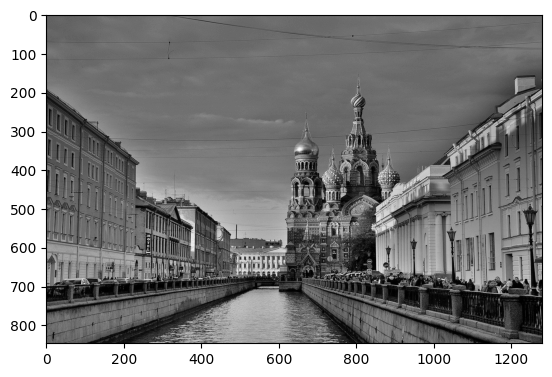

In [2]:
img = cv2.imread('1.jpg')
image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(image,cmap='gray');

3. Выполните вейвлет-преобразование Хаара.

In [3]:
wavelet = 'haar'
c = pywt.dwt2(image,wavelet)
cA, (cH, cV, cD)= c

Постройте гистограмму набора (фильтра) cA. Введите максимальное значение функции *h(n)*:

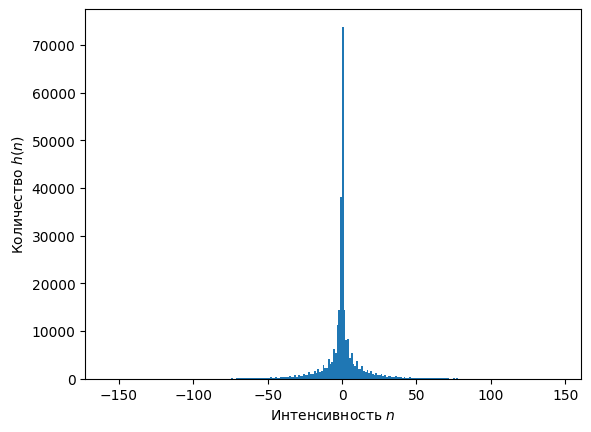

max(h(n)) = 73824.0
max n = 133


In [6]:
gray_hist = plt.hist(cD.ravel(), bins = 256) # ВНИМАНИЕ
plt.xlabel('Интенсивность $n$')
plt.ylabel('Количество $h(n)$')
plt.show()
maxh = 0;
n = 0;
for i in range (0,256):
  if (gray_hist[0][i] >= maxh):
    n = i;
    maxh = gray_hist[0][i];
print("max(h(n)) =", maxh)
print("max n =", n)

Какому набору (фильтру) соответствует изображение (Ниже выведены все изображения):

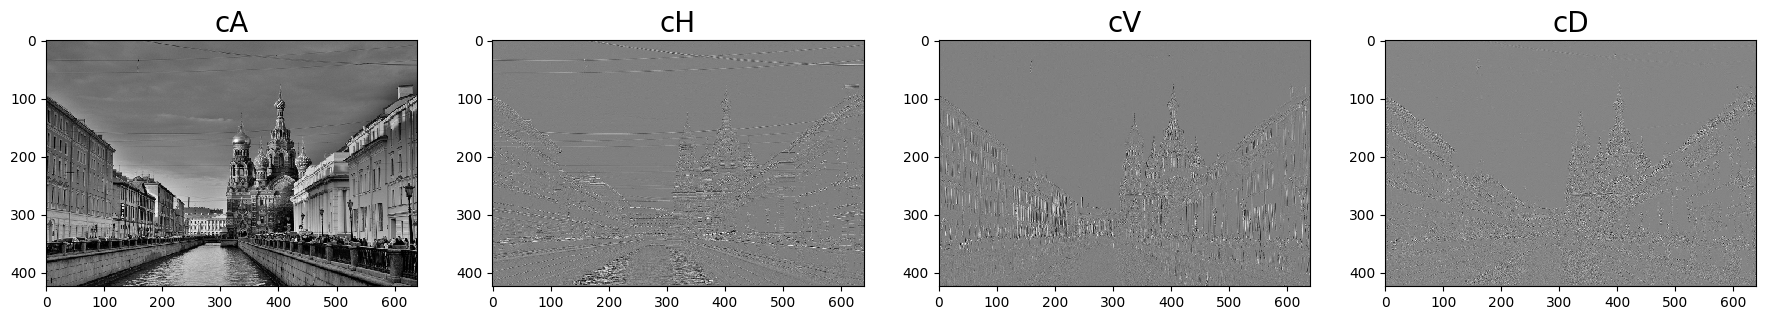

In [5]:
titles = ['cA', 'cH', 'cV', 'cD']
fig = plt.figure(figsize=(18, 3))
for i, a in enumerate([cA, cH, cV, cD]):
  ax = fig.add_subplot(1, 4, i + 1)
  ax.imshow(a, interpolation="nearest", cmap = 'gray')
  ax.set_title(titles[i], fontsize=20)
fig.tight_layout()
plt.show()

# Задание 2

1. С помощью библиотеки OpenCV считайте изображение:

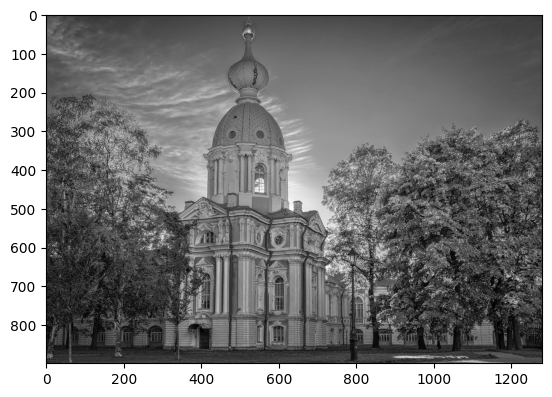

In [7]:
img = cv2.imread('2.jpg')
image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(image, cmap='gray');

2. Выполните вейвлет-преобразование Хаара.

In [8]:
c = pywt.dwt2(image, 'haar')
cA, (cH, cV, cD)= c

3. Выполните повторное вейвлет-преобразование Хаара для набора cA.

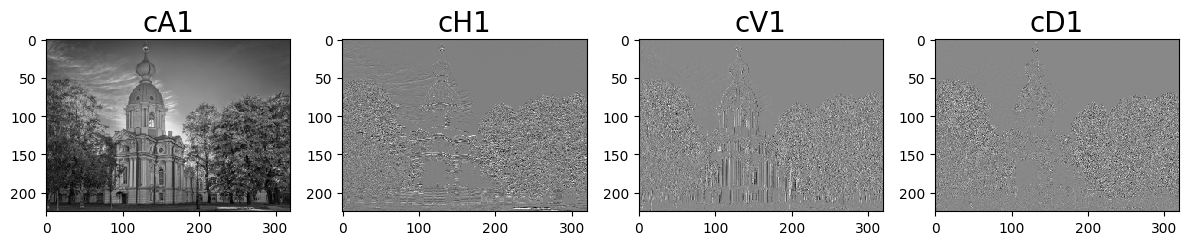

In [9]:
c1 = pywt.dwt2(cA,wavelet)
cA1, (cH1, cV1, cD1) = c1
titles = ['cA1', 'cH1', 'cV1', 'cD1']
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([cA1, cH1, cV1, cD1]):
  ax = fig.add_subplot(1, 4, i + 1)
  ax.imshow(a, interpolation="nearest", cmap = 'gray')
  ax.set_title(titles[i], fontsize=20)
fig.tight_layout()
plt.show()

4. Обнулите коэффициенты меньшие по модулю значения threshold = 110 набора cA1.

In [10]:
threshold = 40
h1 = cA1.shape[0] # у нас все наборы имеют вид квадратной матрицы
for i in range(h1):
      cA1[i][np.abs(cA1[i])<threshold] = 0.0 # для cA1
      for j in range(len(c1[1])):
         c1[1][j][i][np.abs(c1[1][j][i])<threshold] = 0.0  # для cH1,cV1,cD1

Введите количество таких коэффициентов:

In [11]:
print('Количество нулей в наборе cA1 =',sum(sum(c1[0][m] == 0) for m in range(len(c1[0]))))
print('Количество нулей в наборе cH1 =',sum(sum(c1[1][0][m] == 0) for m in range(len(c1[1][0]))))
print('Количество нулей в наборе cV1 =',sum(sum(c1[1][1][m] == 0) for m in range(len(c1[1][1]))))
print('Количество нулей в наборе cD1 =',sum(sum(c1[1][2][m] == 0) for m in range(len(c1[1][2]))))

Количество нулей в наборе cA1 = 143
Количество нулей в наборе cH1 = 57505
Количество нулей в наборе cV1 = 57787
Количество нулей в наборе cD1 = 62093


5. **Сохраните** или отобразите полученное изображение.

In [12]:
cv2.imwrite('test_haar.jpg',cA1)

True

Т.к. просто по изображению может быть не видно, какая картинка верная, то обработаем кодом и выведем количество отличий для всех пяти (нужно сохранить и добавить в юпитер все 5 из опенебу):

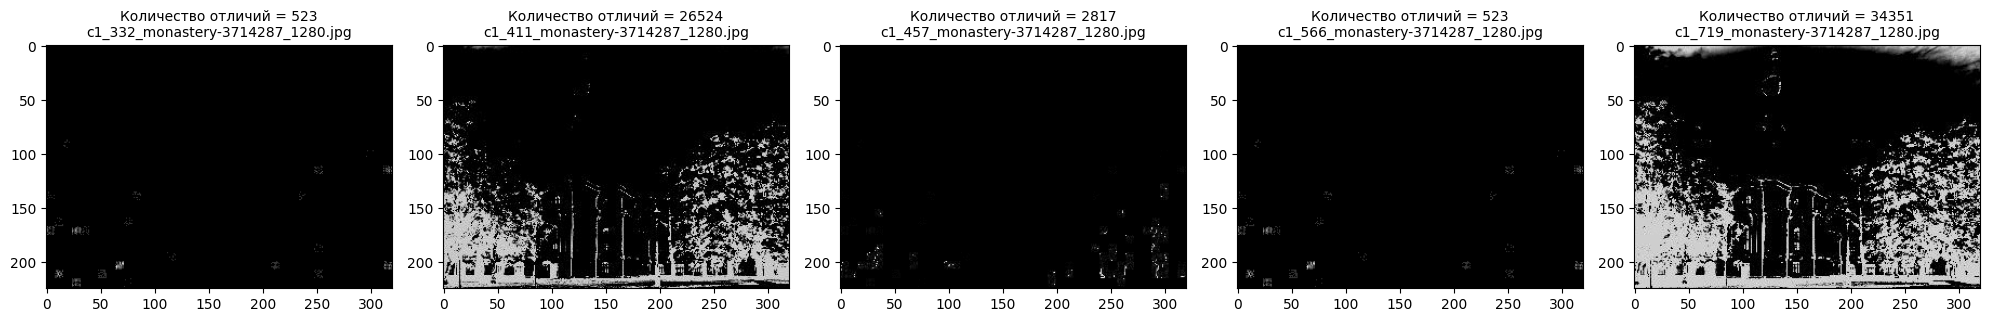

In [15]:
img_haar=Image.open('test_haar.jpg')  # открываем сохранённое
img_names = [    # имена изображений опенебу
  'c1_332_monastery-3714287_1280.jpg',
  'c1_411_monastery-3714287_1280.jpg',
  'c1_457_monastery-3714287_1280.jpg',
  'c1_566_monastery-3714287_1280.jpg',
  'c1_719_monastery-3714287_1280.jpg',
]
size = img_haar.size
fig = plt.figure(figsize=(20, 3))
for i in range(len(img_names)):
  img_openebu=Image.open(img_names[i]) # открываем изображение опенебу
  result = ImageChops.difference(img_haar, img_openebu)
  ax = fig.add_subplot(1, 5, i + 1)
  ax.imshow(result, cmap = 'gray')
  count = 0
  for x in range(size[0]):
    for y in range(size[1]):
      if (result.getpixel((x, y)) != 0):
        count += 1
  ax.set_title("Количество отличий = "+str(count)+"\n"+img_names[i], fontsize=10)
  if (count == 0):
    print("Нужная картинка:\n" + img_names[i])
fig.tight_layout()
plt.show()

У меня тут 2 картинки были верные (хз почему), я выбрал первую из них, опенеду принял. Будьте аккуратны, всего 3 попытки на второе задание.